# MNIST Handwritten Digits Classification using Neural Network

# Introduction

The data files contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255, inclusive.

# Problem-Statement
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

# 1.Import Python modules

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load Dataset - MNIST

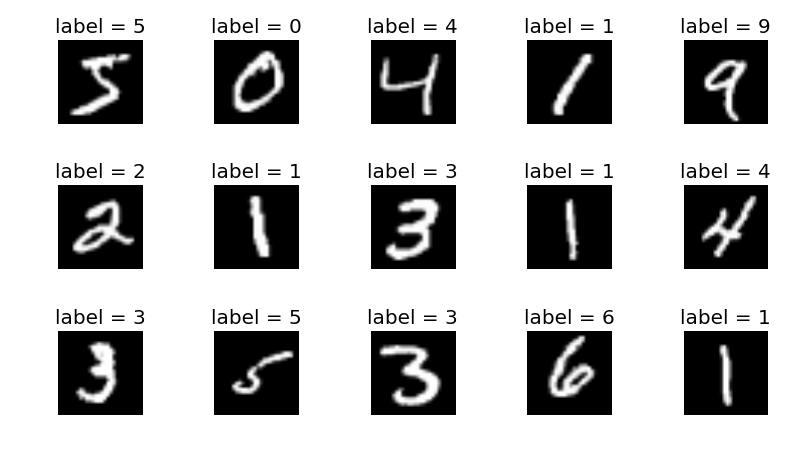

In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print("X train data shape:",X_train.shape)
print("X test data shape:",X_test.shape)

print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X train data shape: (60000, 28, 28)
X test data shape: (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


# 3. Scaling

In [29]:
from tensorflow.keras.utils import to_categorical
y_train_saved = y_train
y_test_saved = y_test

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("y_train_cat shape",y_train_cat.shape)
print("y_test_cat shape",y_test_cat.shape)

# Normalize the features
X_train = X_train / 255
X_test = X_test / 255

# reashaping the 784 pixels into 28 x 28 matrix which represents the pixels of the actual image
# as input we will have an array of these matrices
X_train_scaled = X_train.reshape(X_train.shape[0],28*28)
X_test_scaled = X_test.reshape(X_test.shape[0],28*28)
print("X_train_scaled shape",X_train_scaled.shape)
print("X_test_scaled shape",X_train_scaled.shape)

y_train_cat shape (60000, 10)
y_test_cat shape (10000, 10)
X_train_scaled shape (60000, 784)
X_test_scaled shape (60000, 784)


# 4. Model - Summary -  Compile - fit

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 60)                6060      
                                                                 
 dense_7 (Dense)             (None, 40)                2440      
                                                                 
 dense_8 (Dense)             (None, 20)                820       
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 88030 (343.87 KB)
Trainable params: 88030 (343.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy']
              )

history=model.fit(X_train_scaled, y_train_cat,validation_data=(X_test_scaled, y_test_cat), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9165 - val_loss: 0.1735 - val_accuracy: 0.9475
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1143 - accuracy: 0.9652 - val_loss: 0.1257 - val_accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9744 - val_loss: 0.1209 - val_accuracy: 0.9651
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.1108 - val_accuracy: 0.9666
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.0944 - val_accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.1053 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.1093 - val_accuracy:

In [32]:
model.evaluate(X_test_scaled, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9784


[0.09127914160490036, 0.9783999919891357]

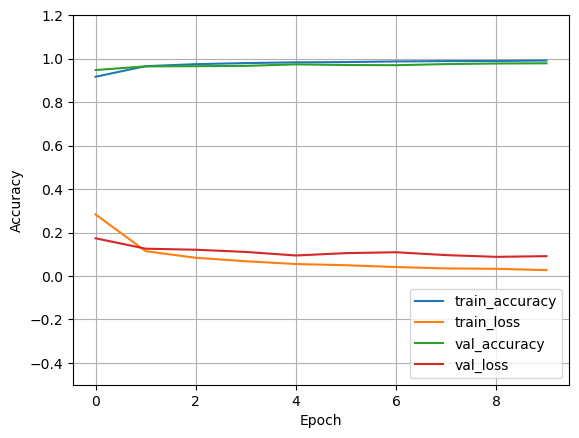

In [33]:
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

# 5.Performance Matrix

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test_scaled)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = confusion_matrix(y_test,y_predicted_labels)
cm

313/313 [==============================] - 0s 885us/step


array([[ 969,    1,    3,    0,    1,    0,    2,    1,    2,    1],
       [   0, 1125,    1,    0,    2,    1,    2,    1,    3,    0],
       [   0,    2, 1009,    2,    3,    1,    1,    8,    4,    2],
       [   0,    0,    5,  981,    0,    6,    0,    5,    4,    9],
       [   0,    0,    4,    0,  956,    0,    4,    4,    0,   14],
       [   2,    0,    0,   12,    0,  867,    2,    2,    1,    6],
       [   1,    2,    2,    0,    3,    2,  946,    0,    2,    0],
       [   1,    4,    7,    0,    0,    0,    0, 1007,    2,    7],
       [   0,    0,    9,    5,    2,    7,    3,    5,  935,    8],
       [   2,    2,    0,    0,    8,    3,    0,    5,    0,  989]],
      dtype=int64)

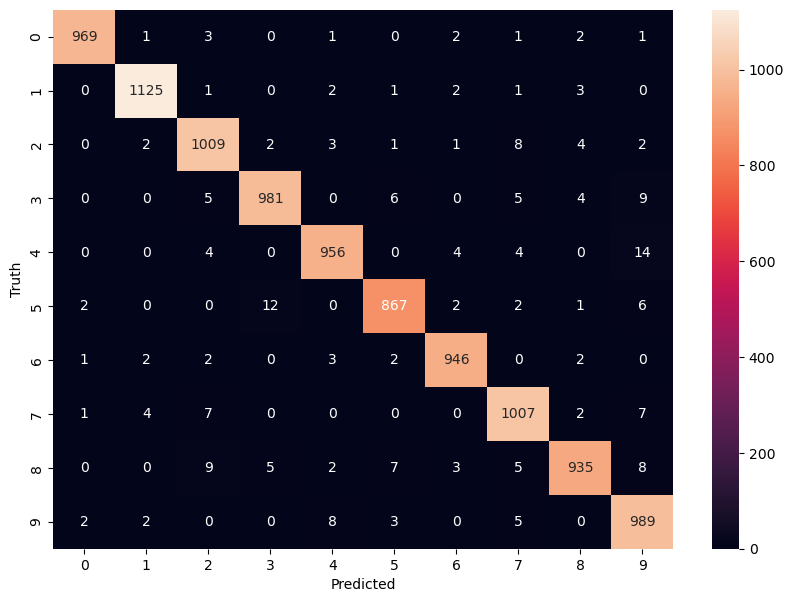

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# 6. Predict the Image

## Using Pillow (PIL)

Original image shape: (1480, 1490)
Resized image shape: (28, 28)
1/1 [==============================] - 0s 17ms/step
Predicted class: 7


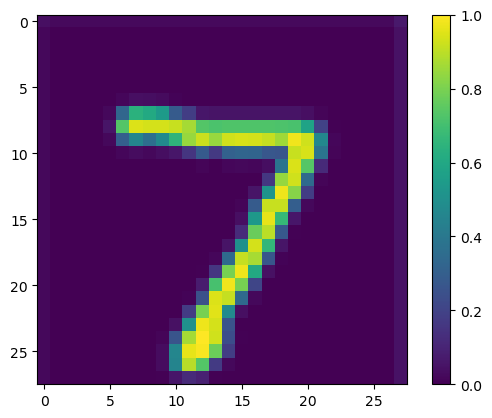

In [36]:
from PIL import Image
import numpy as np

image_path = "sample_image.png"
gray_image = Image.open(image_path).convert('L')
gray_array = np.array(gray_image)

print("Original image shape:", gray_array.shape) # (height,width)

image_resized = gray_image.resize((28, 28))
image_scaled = np.array(image_resized)


print("Resized image shape:", image_scaled.shape) # (height,width)

# Convert image to float32 and normalize
image_scaled = image_scaled.astype('float32') / 255.0

# Reshape the image to match the model input shape
image_scaled_final = image_scaled.reshape(1, 28*28)

# Make prediction using the model
predict_value = model.predict(image_scaled_final)

# Get the index of the class with the highest probability
value = np.argmax(predict_value)

print("Predicted class:", value)

plt.figure()
plt.imshow(image_scaled)
plt.colorbar()
plt.show()

## Using cv2

(1480, 1490)
(28, 28)
1/1 [==============================] - 0s 17ms/step
predicted calss: 7


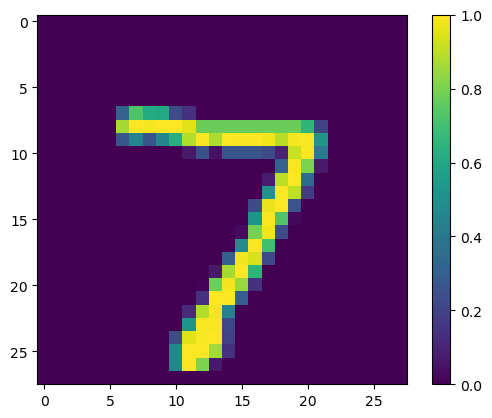

In [37]:
import cv2
gray_image = cv2.imread("sample_image.png", cv2.IMREAD_GRAYSCALE)
print(gray_image.shape) # (height,width,channels)

image_scaled = cv2.resize(gray_image, (28, 28)) # (width,height)
print(image_scaled.shape)

image_scaled = image_scaled.astype('float32')
image_scaled=image_scaled/255.0

# Reshape the image to match the model input shape
image_scaled_final = image_scaled.reshape(1, 28*28)

predict_value = model.predict(image_scaled_final)
value = np.argmax(predict_value)
print("predicted calss:",value) 

plt.figure()
plt.imshow(image_scaled)
plt.colorbar()
plt.show()